<a href="https://colab.research.google.com/github/aritri1/aritri1/blob/main/KPMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt 

In [15]:
df_transaction=pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", "Transactions")

In [16]:
df_transaction

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [9]:
df_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [10]:
df_transaction.shape

(20000, 13)

In [11]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [12]:
df_transaction.duplicated().value_counts()

False    20000
dtype: int64

In [13]:
df_transaction.product_id.value_counts()

0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64

In [17]:
df_transaction.customer_id.value_counts()

2183    14
2476    14
1068    14
1672    13
2912    13
        ..
898      1
2352     1
1846     1
3279     1
1757     1
Name: customer_id, Length: 3494, dtype: int64

In [18]:
df_transaction.transaction_date.dt.year.value_counts()

2017    20000
Name: transaction_date, dtype: int64

In [19]:
df_transaction.transaction_date.dt.month.value_counts()

10    1771
8     1749
7     1717
5     1685
1     1682
11    1665
3     1656
4     1655
12    1644
2     1623
6     1581
9     1572
Name: transaction_date, dtype: int64

In [20]:
df_transaction.transaction_date.dt.date.value_counts()

2017-02-14    82
2017-08-18    82
2017-10-15    76
2017-01-31    73
2017-12-19    71
              ..
2017-01-12    38
2017-12-07    37
2017-03-29    36
2017-09-25    35
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64

In [21]:
df_transaction.transaction_date.dt.day.value_counts()

15    713
18    705
16    696
14    695
9     693
22    690
20    683
17    682
8     678
21    673
11    672
6     669
2     669
13    668
1     667
25    665
5     655
10    653
19    650
4     646
23    643
24    636
27    636
7     635
28    625
3     621
12    620
26    617
30    567
29    550
31    328
Name: transaction_date, dtype: int64

In [22]:
df_transaction.brand.value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [23]:
df_transaction.brand.value_counts().sum()

19803

In [24]:
df_transaction.product_size.value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [25]:
df_transaction.product_size.value_counts().sum()

19803

In [26]:
df_transaction.product_line.value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [27]:
df_transaction.product_class.value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [28]:
df_transaction.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [29]:
df_transaction.online_order.value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [30]:
df_transaction.list_price.value_counts()

2091.47    465
1403.50    396
71.49      274
1231.15    235
1890.39    233
          ... 
56.21        1
126.36       1
1300.96      1
1697.27      1
867.92       1
Name: list_price, Length: 296, dtype: int64

In [31]:
df_transaction.list_price.mean()

1107.8294489999998

<Axes: >

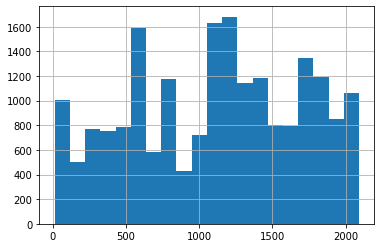

In [33]:
df_transaction.list_price.hist(bins=20)

In [34]:
df_transaction.standard_cost.min()

7.21

In [35]:
df_transaction.standard_cost.mean()

556.0469512209312

<Axes: >

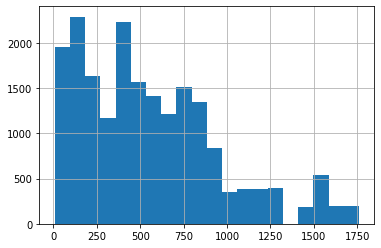

In [36]:
df_transaction.standard_cost.hist(bins=20)